In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [2]:
torch.manual_seed(42)

In [3]:
df = pd.read_csv("fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [4]:
df.shape

(6000, 785)

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

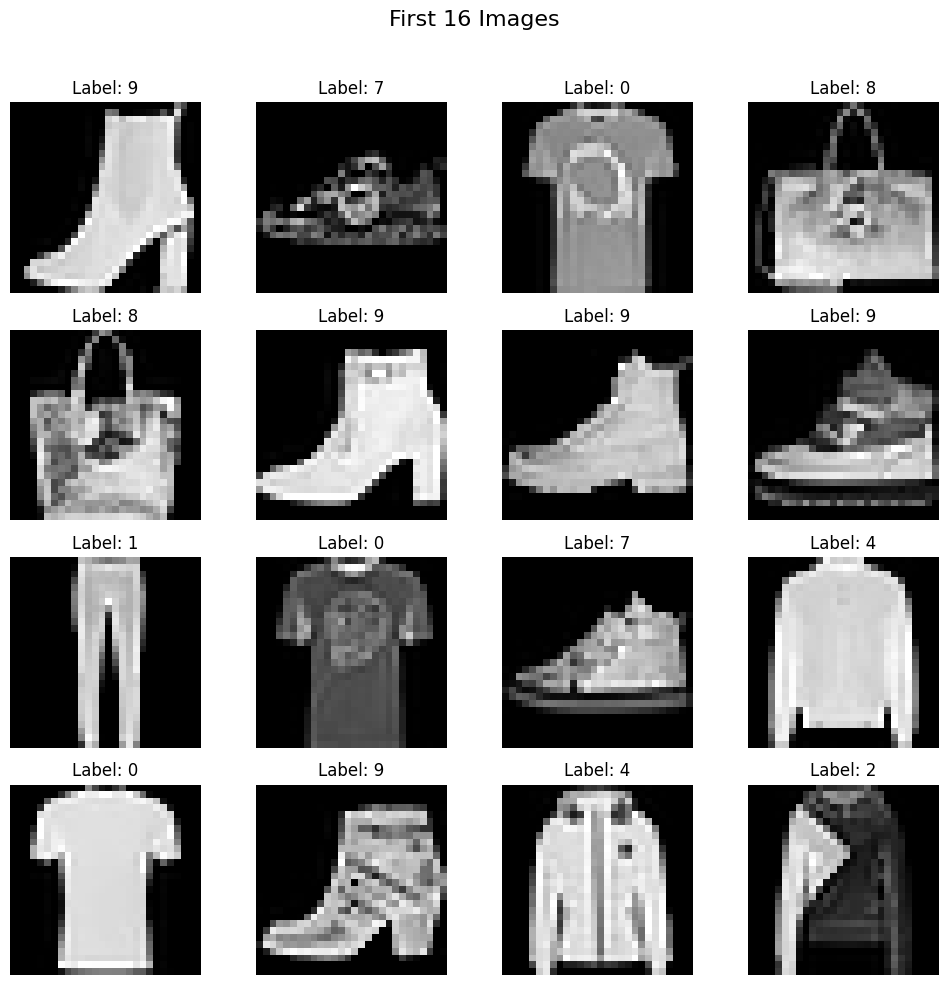

In [6]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img, cmap="gray")  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

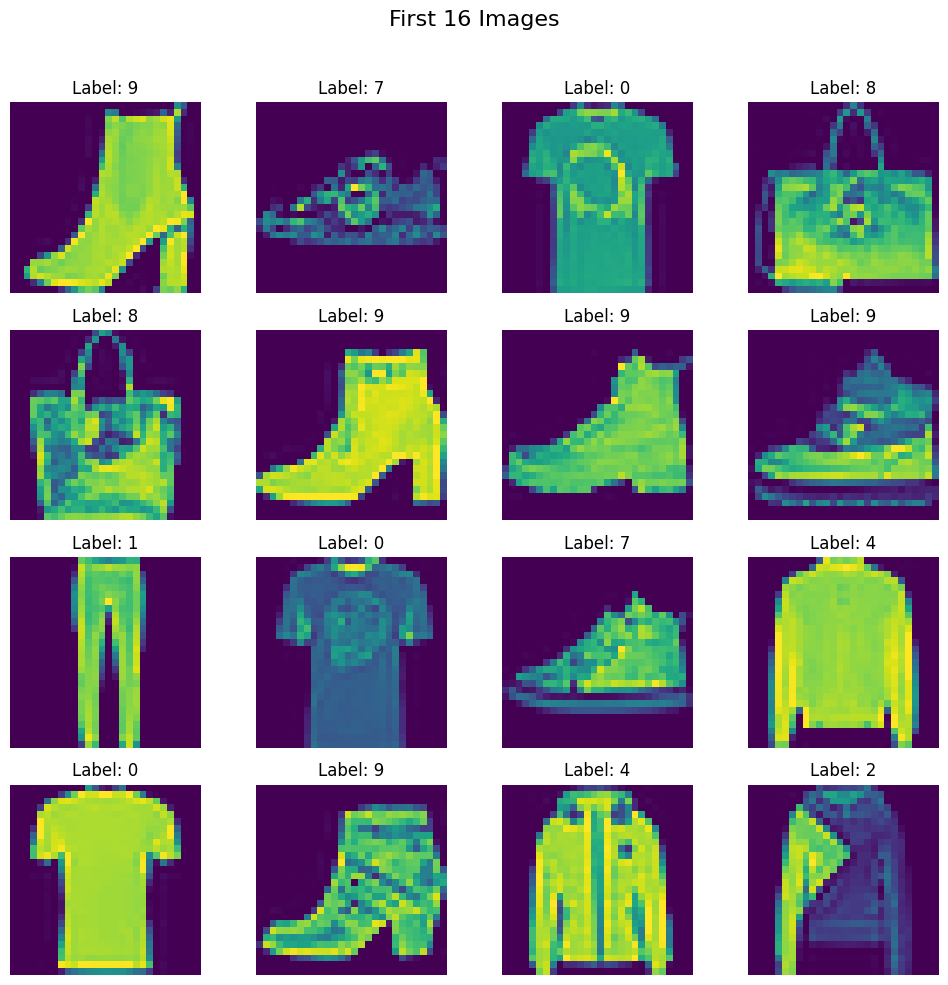

In [7]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [8]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [9]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 16,  0,  0]], dtype=int64)

In [13]:
X_train

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 16,  0,  0]], dtype=int64)

In [14]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [15]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [28]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32).cuda()
    self.labels = torch.tensor(labels, dtype=torch.long).cuda()

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]

In [29]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [30]:
train_dataset[1]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0039, 0.0000, 0.0000, 0.3843, 0.3765, 0.3922, 0.3804, 0.3176, 0.0000,
         0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0275, 0.8627, 0.7059, 0.6196, 0.6471, 0.8157,
         0.0275, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.0000, 0.0275, 0.3529, 0.7098, 0.5529, 0.7137, 0.8980, 0.7137,
         0.6471, 0.7765, 0.4353, 0.1608, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3137, 0.5804, 0.7098, 0.7059, 0.5922, 0.5882, 0.5490, 0.7647,
         0.5765, 0.6588, 0.6157, 0.6863, 0.7686, 0.6588, 0.4196, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [31]:
train_dataset.labels

tensor([7, 6, 7,  ..., 0, 8, 6], device='cuda:0')

In [32]:
train_dataset.features

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0627, 0.0000, 0.0000]],
       device='cuda:0')

In [33]:
# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [34]:
train_dataset.features.device

device(type='cuda', index=0)

In [35]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [36]:
len(train_loader)

150

In [37]:
len(test_loader)

38

In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [39]:
class FufaNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
            # here we dont need to write the softmax code becuase pytorch handles it internally while using crossentropyloss
        )

    def forward(self, x):
        return self.network(x)
model = FufaNN(train_dataset.features.shape[1]).to(device)

In [40]:
model

FufaNN(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [41]:
train_dataset.features.shape

torch.Size([4800, 784])

In [42]:
model.state_dict()

OrderedDict([('network.0.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0195,  0.0034,  0.0302,  ..., -0.0030, -0.0317,  0.0128],
                      [-0.0107,  0.0221, -0.0158,  ..., -0.0121,  0.0042,  0.0318],
                      [-0.0106,  0.0342,  0.0240,  ...,  0.0091,  0.0174,  0.0041]],
                     device='cuda:0')),
             ('network.0.bias',
              tensor([-8.6770e-04,  2.6513e-02,  2.4231e-02,  3.5641e-03, -3.2895e-02,
                       2.1752e-02,  3.3599e-02, -8.3219e-03, -8.0973e-03, -5.9837e-03,
                      -1.4779e-03,  3.3858e-02,  1.4686e-02, -3.0424e-02, -1.8899e-02,
                      -2.9557e-03, -1.8481e-02, -3.1352e-02,  1.0393e-02,  2.9328e-02,
              

In [44]:
# loss and optimizer
loss_fc = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [48]:
import time

start_time = time.time()
# training loop
epochs = 100

for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:

        # forward pass
        outputs = model(batch_features)
        # calculate loss
        loss = loss_fc(outputs, batch_labels)

        optimizer.zero_grad()
        # backward pass
        loss.backward()
        # update grads
        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()
    avg_loss = total_epoch_loss / len(train_loader)
    print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

end_time = time.time()
print(f"Total time for training:  {(end_time-start_time) / 60} Minutes!")

Epoch: 1 , Loss: 0.08705439866830905
Epoch: 2 , Loss: 0.09007844360545278
Epoch: 3 , Loss: 0.0788736880881091
Epoch: 4 , Loss: 0.08407911409934361
Epoch: 5 , Loss: 0.08565281153346102
Epoch: 6 , Loss: 0.07808410216743747
Epoch: 7 , Loss: 0.07793858642379443
Epoch: 8 , Loss: 0.08637721647508442
Epoch: 9 , Loss: 0.0745083313435316
Epoch: 10 , Loss: 0.07751341244205832
Epoch: 11 , Loss: 0.0698985028018554
Epoch: 12 , Loss: 0.0762654548510909
Epoch: 13 , Loss: 0.07984832984705766
Epoch: 14 , Loss: 0.07514774979402622
Epoch: 15 , Loss: 0.06894487765928109
Epoch: 16 , Loss: 0.0710724295830975
Epoch: 17 , Loss: 0.068584068082273
Epoch: 18 , Loss: 0.07257000592226784
Epoch: 19 , Loss: 0.06771690908819437
Epoch: 20 , Loss: 0.06223149896909793
Epoch: 21 , Loss: 0.06096562149313589
Epoch: 22 , Loss: 0.06732324233278632
Epoch: 23 , Loss: 0.07171126104270419
Epoch: 24 , Loss: 0.0639541104932626
Epoch: 25 , Loss: 0.0696722797739009
Epoch: 26 , Loss: 0.05735968514035145
Epoch: 27 , Loss: 0.0641128903

In [49]:
# evaluation code
model.eval()
total = 0
correct = 0

with torch.no_grad():

    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)

        _, predicted = torch.max(outputs, 1)
        total = total + batch_labels.shape[0]
        correct = correct + (predicted == batch_labels).sum().item()
        # print(batch_labels.shape[0])
    print(total, correct)
    print("Acuraccy:", correct/total)

1200 985
Acuraccy: 0.8208333333333333


In [50]:
1002/1200

0.835

In [51]:
10/1200

0.008333333333333333